Cities:  ['Bangalore', 'Shanghai', 'Jakarta', 'Singapore', 'Tokyo']
Flight routes:  [('Bangalore', 'Singapore'), ('Bangalore', 'Shanghai'), ('Bangalore', 'Jakarta'), ('Shanghai', 'Tokyo'), ('Jakarta', 'Singapore'), ('Jakarta', 'Tokyo'), ('Singapore', 'Tokyo')]


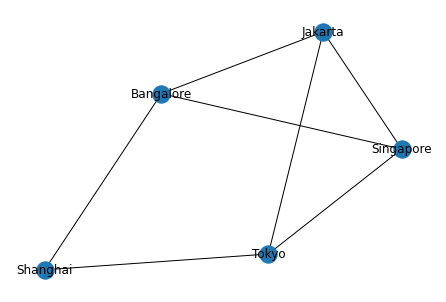

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_nodes_from(["Bangalore","Shanghai","Jakarta","Singapore","Tokyo"])
G.add_edges_from([("Bangalore","Singapore"),("Shanghai","Tokyo"),("Jakarta","Singapore"),("Tokyo","Jakarta"),("Shanghai","Bangalore"),("Tokyo","Singapore"),("Bangalore","Jakarta")])
print('Cities: ',G.nodes())
print('Flight routes: ',G.edges())
nx.draw(G,with_labels=True)
plt.show()

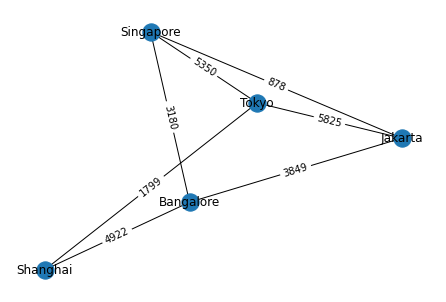

In [4]:
'''Label assignment
Nodes (cities): timezones
Routes: distances in km'''
time_zones={'Bangalore':{'Time zone':'UTC+5:30'},'Jakarta':{'Time zone':'UTC+7'},'Shanghai':{'Time zone':'UTC+8'},'Singapore':{'Time zone':'UTC+8'},'Tokyo':{'Time zone':'UTC+9'}}
nx.set_node_attributes(G,time_zones)

G["Bangalore"]["Singapore"]['weight']=3180
G["Shanghai"]["Tokyo"]['weight']=1799
G["Jakarta"]["Singapore"]['weight']=878
G["Tokyo"]["Jakarta"]['weight']=5825
G["Shanghai"]["Bangalore"]['weight']=4922
G["Tokyo"]["Singapore"]['weight']=5350
G["Bangalore"]["Jakarta"]['weight']=3849
pos=nx.spring_layout(G, k=25)
nx.draw(G,pos,with_labels=True)
dist={e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G,pos,edge_labels=dist)
plt.show()

In [13]:
centrality_dict=nx.degree_centrality(G)
print('Centrality; ',centrality_dict) #Degree centrality
closeness_dict=nx.closeness_centrality(G)
print('Closeness: ',closeness_dict)
bw_centrality=nx.betweenness_centrality(G,k=3,endpoints=True)
print('Betweenness centrality (k=3): ',bw_centrality)
bw_centrality_full=nx.betweenness_centrality(G,k=3,endpoints=True)
print('Betweenness centrality (k=5): ',bw_centrality_full)

Centrality;  {'Bangalore': 0.75, 'Shanghai': 0.5, 'Jakarta': 0.75, 'Singapore': 0.75, 'Tokyo': 0.75}
Closeness:  {'Bangalore': 0.8, 'Shanghai': 0.6666666666666666, 'Jakarta': 0.8, 'Singapore': 0.8, 'Tokyo': 0.8}
Betweenness centrality (k=3):  {'Bangalore': 0.375, 'Shanghai': 0.5277777777777777, 'Jakarta': 0.27777777777777773, 'Singapore': 0.5277777777777777, 'Tokyo': 0.625}
Betweenness centrality (k=5):  {'Bangalore': 0.3333333333333333, 'Shanghai': 0.27777777777777773, 'Jakarta': 0.5277777777777777, 'Singapore': 0.5277777777777777, 'Tokyo': 0.5833333333333333}


In [16]:
short_path_SH_JK=nx.shortest_path(G,source='Shanghai',target='Jakarta',weight='weight',method='dijkstra')
short_path_BL_TK=nx.shortest_path(G,source='Bangalore',target='Tokyo',weight='weight',method='dijkstra')
print('Shortest path (Shanghai to Jakarta): ',short_path_SH_JK)
print('Shortest path (Bangalore to Tokyo): ',short_path_BL_TK)
avg_short_path=nx.average_shortest_path_length(G,weight='weight')
print('Average shortest path length: ',avg_short_path)
all_pairs_short=dict(nx.all_pairs_shortest_path(G,cutoff=None))
print('Singapore to Shanghai (Dijkstra): ',all_pairs_short['Singapore']['Shanghai'])
print('Bangalore to Tokyo (Dijkstra): ',all_pairs_short['Bangalore']['Tokyo'])

Shortest path (Shanghai to Jakarta):  ['Shanghai', 'Tokyo', 'Jakarta']
Shortest path (Bangalore to Tokyo):  ['Bangalore', 'Shanghai', 'Tokyo']
Average shortest path length:  4729.7
Singapore to Shanghai (Dijkstra):  ['Singapore', 'Bangalore', 'Shanghai']
Bangalore to Tokyo (Dijkstra):  ['Bangalore', 'Singapore', 'Tokyo']
